In [1]:
import os
%cd datasets
!bash get_datasets.sh
%cd ..

/Users/letunglam/Projects/deep-learning-training/minigrad/datasets
/Users/letunglam/Projects/deep-learning-training/minigrad


In [2]:
# Setup cell
import time
import numpy as np
import matplotlib.pyplot as plt
from classifiers.fc_net import *
from data_utils import get_CIFAR10_data
from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from solver import Solver

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ Returns relative error."""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(f"{k}: {v.shape}")

X_train: (4900, 3, 32, 32)
y_train: (4900,)
X_val: (1000, 3, 32, 32)
y_val: (1000,)
X_test: (1000, 3, 32, 32)
y_test: (1000,)


In [4]:
np.random.seed(42)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print("Running check with reg = ", reg)
    model = FullyConnectedNet(
        [H1, H2],
        input_dim=D,
        num_classes=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64,
    )
    loss , grads = model.loss(X, y)
    print("Initial loss: ", loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f"{name} relative error: {rel_error(grad_num, grads[name])}")

Running check with reg =  0
Initial loss:  2.309647806660724
W1 relative error: 1.5274335406269306e-07
W2 relative error: 7.232354318551732e-06
W3 relative error: 8.844974618815572e-07
b1 relative error: 3.538960679861088e-09
b2 relative error: 9.636365670888834e-09
b3 relative error: 1.4843118752555537e-10
Running check with reg =  3.14
Initial loss:  6.834753343737317
W1 relative error: 3.027514677269763e-08
W2 relative error: 3.994284275435042e-08
W3 relative error: 7.170929077600087e-08
b1 relative error: 1.4046974125442178e-08
b2 relative error: 2.790924086784274e-09
b3 relative error: 1.2823595555564292e-10


(Iteration 1 / 40) loss: 6.016919
(Epoch 0 / 20) train acc: 0.220000; val acc: 0.142000
(Epoch 1 / 20) train acc: 0.280000; val acc: 0.123000
(Epoch 2 / 20) train acc: 0.500000; val acc: 0.140000
(Epoch 3 / 20) train acc: 0.680000; val acc: 0.141000
(Epoch 4 / 20) train acc: 0.680000; val acc: 0.134000
(Epoch 5 / 20) train acc: 0.800000; val acc: 0.152000
(Iteration 11 / 40) loss: 0.753423
(Epoch 6 / 20) train acc: 0.880000; val acc: 0.161000
(Epoch 7 / 20) train acc: 0.920000; val acc: 0.152000
(Epoch 8 / 20) train acc: 0.940000; val acc: 0.156000
(Epoch 9 / 20) train acc: 0.980000; val acc: 0.151000
(Epoch 10 / 20) train acc: 0.980000; val acc: 0.163000
(Iteration 21 / 40) loss: 0.258299
(Epoch 11 / 20) train acc: 0.980000; val acc: 0.158000
(Epoch 12 / 20) train acc: 0.980000; val acc: 0.163000
(Epoch 13 / 20) train acc: 0.980000; val acc: 0.159000
(Epoch 14 / 20) train acc: 0.980000; val acc: 0.157000
(Epoch 15 / 20) train acc: 0.980000; val acc: 0.157000
(Iteration 31 / 40) loss: 

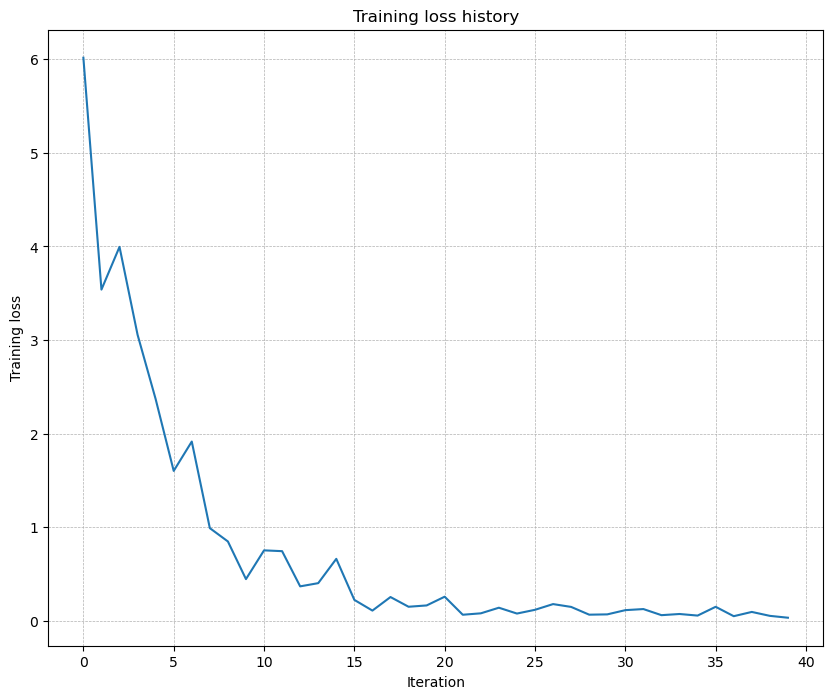

In [5]:
# Use a threel=-layer Net to overfit 50 training examples by
# tweaking just the learning rate and initializtion scale.

num_train = 50
small_data = {
    "X_train": data["X_train"][:num_train],
    "y_train": data["y_train"][:num_train],
    "X_val": data["X_val"],
    "y_val": data["y_val"],
}

weight_scale = 3e-2
learning_rate = 1e-3

model = FullyConnectedNet(
    [100,100],
    weight_scale=weight_scale,
    dtype=np.float64
)
solver = Solver(
    model, small_data,
    print_every=10, num_epochs=20,
    batch_size = 25,
    update_rule="sgd",
    optim_config={"learning_rate": learning_rate},
)
solver.train()

plt.plot(solver.loss_history)
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

(Iteration 1 / 40) loss: 8.990845
(Epoch 0 / 20) train acc: 0.180000; val acc: 0.073000
(Epoch 1 / 20) train acc: 0.220000; val acc: 0.090000
(Epoch 2 / 20) train acc: 0.360000; val acc: 0.097000
(Epoch 3 / 20) train acc: 0.540000; val acc: 0.102000
(Epoch 4 / 20) train acc: 0.620000; val acc: 0.108000
(Epoch 5 / 20) train acc: 0.660000; val acc: 0.111000
(Iteration 11 / 40) loss: 1.482306
(Epoch 6 / 20) train acc: 0.740000; val acc: 0.126000
(Epoch 7 / 20) train acc: 0.820000; val acc: 0.131000
(Epoch 8 / 20) train acc: 0.820000; val acc: 0.126000
(Epoch 9 / 20) train acc: 0.860000; val acc: 0.120000
(Epoch 10 / 20) train acc: 0.900000; val acc: 0.120000
(Iteration 21 / 40) loss: 0.685699
(Epoch 11 / 20) train acc: 0.900000; val acc: 0.117000
(Epoch 12 / 20) train acc: 0.960000; val acc: 0.129000
(Epoch 13 / 20) train acc: 0.960000; val acc: 0.132000
(Epoch 14 / 20) train acc: 0.980000; val acc: 0.131000
(Epoch 15 / 20) train acc: 0.980000; val acc: 0.128000
(Iteration 31 / 40) loss: 

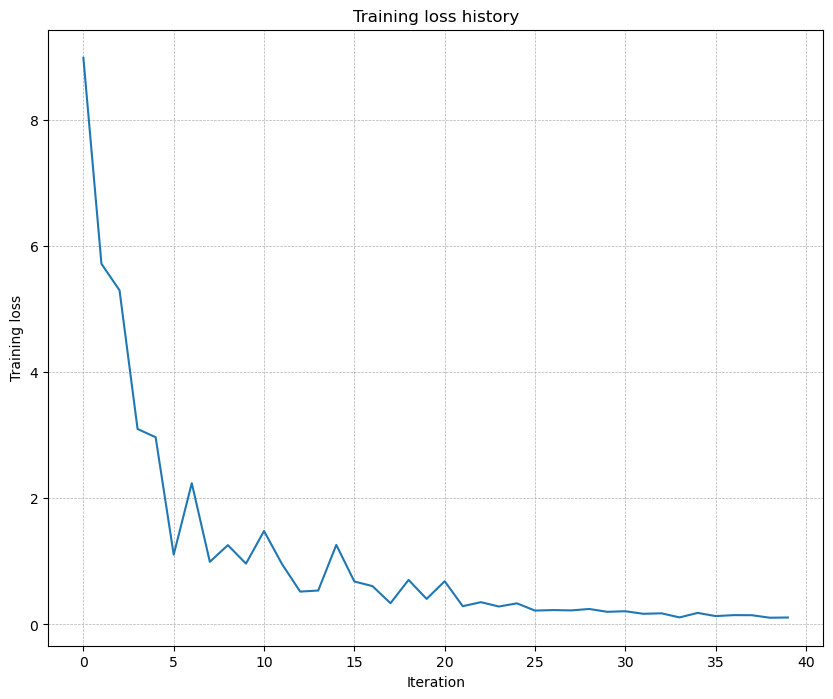

In [28]:
# Use a five-layer Net to overfit 50 training examples by
# tweaking just the learning rate and initialize scale.

num_train = 50
small_data = {
    "X_train": data["X_train"][:num_train],
    "y_train": data["y_train"][:num_train],
    "X_val": data["X_val"],
    "y_val": data["y_val"],
}

weight_scale = 6e-2
learning_rate = 1e-3

model = FullyConnectedNet(
    [100,100, 100, 100],
    weight_scale=weight_scale,
    dtype=np.float64
)
solver = Solver(
    model, small_data,
    print_every=10, num_epochs=20,
    batch_size = 25,
    update_rule="sgd",
    optim_config={"learning_rate": learning_rate},
)
solver.train()

plt.plot(solver.loss_history)
plt.title("Training loss history")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [30]:
from optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N,D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {"learning_rate": 1e-3,
          "velocity": v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
    [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
    [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
    [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
    [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]
])
expected_velocity = np.asanyarray([
    [0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
    [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
    [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
    [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]
])

print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config["velocity"]))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


Running with  sgd
(Iteration 1 / 200) loss: 2.643937
(Epoch 0 / 5) train acc: 0.095500; val acc: 0.082000
(Iteration 11 / 200) loss: 2.271252
(Iteration 21 / 200) loss: 2.251541
(Iteration 31 / 200) loss: 2.211407
(Epoch 1 / 5) train acc: 0.251750; val acc: 0.194000
(Iteration 41 / 200) loss: 2.133148
(Iteration 51 / 200) loss: 2.086343
(Iteration 61 / 200) loss: 2.154537
(Iteration 71 / 200) loss: 2.077702
(Epoch 2 / 5) train acc: 0.298000; val acc: 0.237000
(Iteration 81 / 200) loss: 2.060065
(Iteration 91 / 200) loss: 1.989842
(Iteration 101 / 200) loss: 1.981513
(Iteration 111 / 200) loss: 2.014555
(Epoch 3 / 5) train acc: 0.336250; val acc: 0.257000
(Iteration 121 / 200) loss: 1.902477
(Iteration 131 / 200) loss: 1.883174
(Iteration 141 / 200) loss: 1.857973
(Iteration 151 / 200) loss: 1.817181
(Epoch 4 / 5) train acc: 0.346750; val acc: 0.281000
(Iteration 161 / 200) loss: 1.837631
(Iteration 171 / 200) loss: 1.759704
(Iteration 181 / 200) loss: 1.781225
(Iteration 191 / 200) los

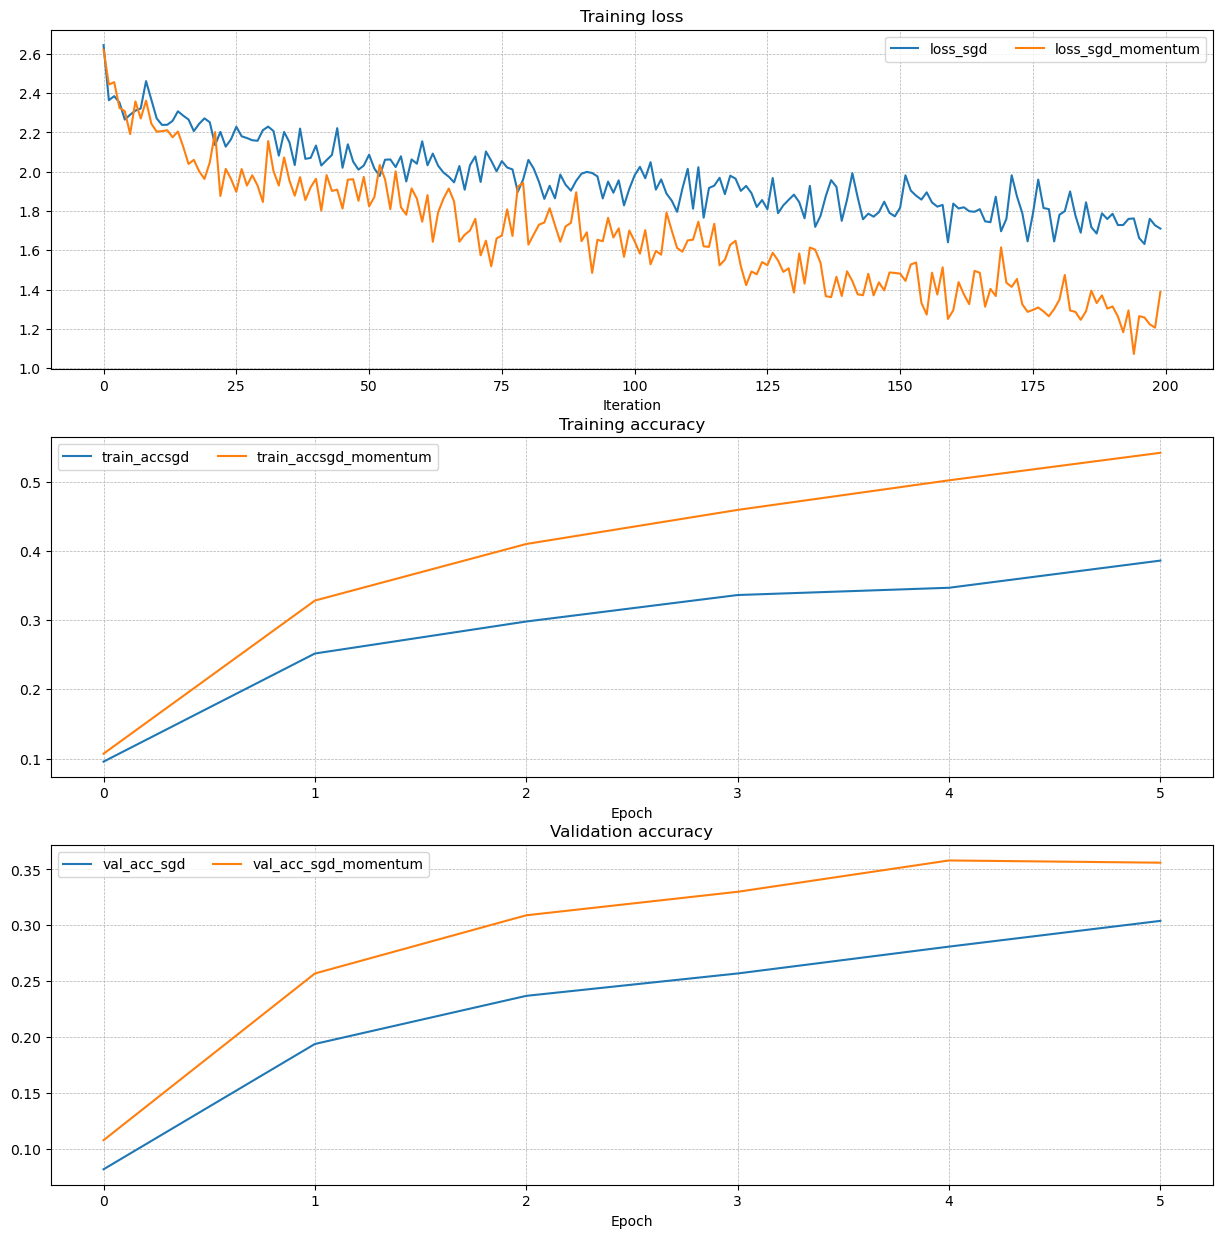

In [31]:
num_train = 4000
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
    print('Running with ', update_rule)
    model = FullyConnectedNet(
        [100, 100, 100, 100, 100],
        weight_scale=5e-2
    )
    solver = Solver(
        model, small_data,
        num_epochs=5, batch_size=100,
        update_rule=update_rule,
        optim_config={'learning_rate': 5e-3}, verbose=True,
    )
    solvers[update_rule] = solver
    solver.train()

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].set_title('Training loss')
axes[0].set_xlabel('Iteration')
axes[1].set_title('Training accuracy')
axes[1].set_xlabel('Epoch')
axes[2].set_title('Validation accuracy')
axes[2].set_xlabel('Epoch')

for update_rule, solver in solvers.items():
    axes[0].plot(solver.loss_history, label=f"loss_{update_rule}")
    axes[1].plot(solver.train_acc_history, label=f"train_acc{update_rule}")
    axes[2].plot(solver.val_acc_history, label=f"val_acc_{update_rule}")

for ax in axes:
    ax.legend(loc="best", ncol=4)
    ax.grid(linestyle='--', linewidth=0.5)

plt.show()


In [32]:
from optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N,D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {"learning_rate": 1e-2,
          'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
    [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
    [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
    [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
    [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]
])
expected_cache = np.asanyarray([
    [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
    [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
    [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
    [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]
])

print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_cache, config["cache"]))

next_w error:  9.524687511038133e-08
velocity error:  2.6477955807156126e-09


In [13]:
from optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

# You should see relative errors around e-7 or less
print('next_w error: ', rel_error(expected_next_w, next_w))
print('v error: ', rel_error(expected_v, config['v']))
print('m error: ', rel_error(expected_m, config['m']))

next_w error:  1.1395691798535431e-07
v error:  4.208314038113071e-09
m error:  4.214963193114416e-09


In [ ]:
from optim import adamw
import numpy as np

def rel_error(x, y):
    return np.max(np.abs(x - y) / np.maximum(1e-8, np.abs(x) + np.abs(y)))

# Dimensions
N, D = 4, 5

# Weights & gradients
w  = np.linspace(-0.4, 0.6, N * D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, N * D).reshape(N, D)

# Initial AdamW state
m = np.linspace(0.6, 0.9, N * D).reshape(N, D)
v = np.linspace(0.7, 0.5, N * D).reshape(N, D)

config = {
    "learning_rate": 1e-2,
    "beta1": 0.9,
    "beta2": 0.999,
    "epsilon": 1e-8,
    "weight_decay": 0.1, 
    "m": m,
    "v": v,
    "t": 5,
}

# Run AdamW
next_w, config = adamw(w, dw, config)

expected_m = 0.9 * m + 0.1 * dw
expected_v = 0.999 * v + 0.001 * (dw ** 2)

t = 6
m_hat = expected_m / (1 - 0.9 ** t)
v_hat = expected_v / (1 - 0.999 ** t)

expected_next_w = w - 1e-2 * (
    m_hat / (np.sqrt(v_hat) + 1e-8) + 0.1 * w
)

# ===== Errors =====
print("next_w error:", rel_error(expected_next_w, next_w))
print("m error:     ", rel_error(expected_m, config["m"]))
print("v error:     ", rel_error(expected_v, config["v"]))


next_w error: 9.60809904407588e-17
m error:      7.571513807565675e-17
v error:      0.0


Runing with  adam
(Iteration 1 / 200) loss: 2.825182
(Epoch 0 / 5) train acc: 0.132500; val acc: 0.145000
(Iteration 11 / 200) loss: 2.159273
(Iteration 21 / 200) loss: 1.994209
(Iteration 31 / 200) loss: 1.904678
(Epoch 1 / 5) train acc: 0.358250; val acc: 0.331000
(Iteration 41 / 200) loss: 1.849437
(Iteration 51 / 200) loss: 1.821144
(Iteration 61 / 200) loss: 1.706911
(Iteration 71 / 200) loss: 1.388990
(Epoch 2 / 5) train acc: 0.445250; val acc: 0.342000
(Iteration 81 / 200) loss: 1.622267
(Iteration 91 / 200) loss: 1.606566
(Iteration 101 / 200) loss: 1.440500
(Iteration 111 / 200) loss: 1.560320
(Epoch 3 / 5) train acc: 0.498000; val acc: 0.351000
(Iteration 121 / 200) loss: 1.476322
(Iteration 131 / 200) loss: 1.419415
(Iteration 141 / 200) loss: 1.487258
(Iteration 151 / 200) loss: 1.237336
(Epoch 4 / 5) train acc: 0.547500; val acc: 0.366000
(Iteration 161 / 200) loss: 1.240012
(Iteration 171 / 200) loss: 1.217208
(Iteration 181 / 200) loss: 1.557164
(Iteration 191 / 200) los

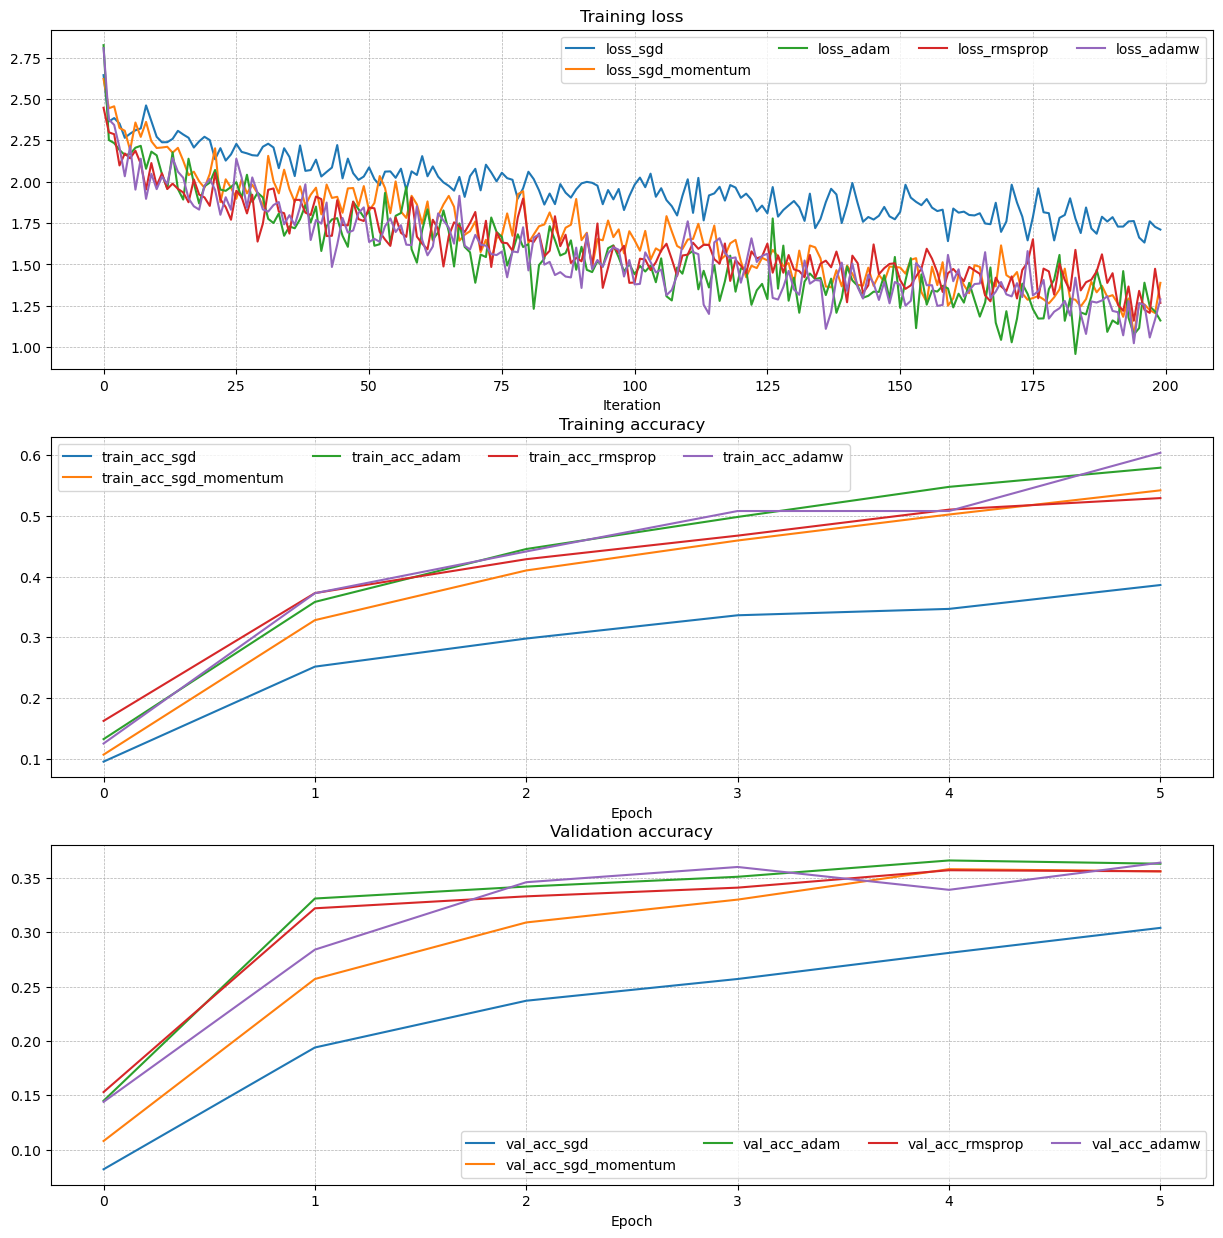

In [33]:
learning_rate = {'rmsprop': 1e-4, 'adam': 1e-3, 'adamw': 1e-3}
for update_rule in ['adam', 'rmsprop' , 'adamw']:
    print('Runing with ', update_rule)
    model = FullyConnectedNet(
        [100, 100, 100, 100, 100],
        weight_scale=5e-2,
    )
    solver = Solver(
        model, small_data, num_epochs=5, batch_size=100,
        update_rule=update_rule, optim_config={'learning_rate': learning_rate[update_rule]},
        verbose=True
    )
    solvers[update_rule]=solver
    solver.train()
    print()

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].set_title('Training loss')
axes[0].set_xlabel('Iteration')
axes[1].set_title('Training accuracy')
axes[1].set_xlabel('Epoch')
axes[2].set_title('Validation accuracy')
axes[2].set_xlabel('Epoch')

for update_rule, solver in solvers.items():
    axes[0].plot(solver.loss_history, label=f"loss_{update_rule}")
    axes[1].plot(solver.train_acc_history, label=f"train_acc_{update_rule}")
    axes[2].plot(solver.val_acc_history, label=f"val_acc_{update_rule}")

for ax in axes:
    ax.legend(loc="best", ncol=4)
    ax.grid(linestyle='--', linewidth=0.5)

plt.show()

In [49]:
best_model = None

best_val = -1    # keep track of best validation accuracy
best_params = {} # dict to hold best model parameters
num_train = 500  # amount of training data for tests

# Generate small dataset
small_data = {
  "X_train": data["X_train"][:num_train],
  "y_train": data["y_train"][:num_train],
  "X_val": data["X_val"],
  "y_val": data["y_val"],
}

# Run 30 experiments
for i in range(30):
    lr = 10 ** np.random.uniform(-4, -2.3)   # learning rate
    ws = 10 ** np.random.uniform(-1.8, -1.2) # weight scale
    reg = 10 ** np.random.uniform(-5, -2)   # reguarization

    model = FullyConnectedNet([256, 128, 100, 100],
                              weight_scale=ws,
                              reg=reg,)
    
    # Create a solver using Adam as optimizer
    solver = Solver(model, small_data,
                    num_epochs=20, batch_size=256,
                    update_rule='adamw',
                    optim_config={'learning_rate': lr},
                    verbose=False)

    solver.train()                # train the model
    new_val = solver.best_val_acc # extract best accuracy

    # Save if validation accuracy is the best
    if new_val > best_val:
        best_val = new_val
        best_params = {'lr':lr, 'ws':ws, 'reg':reg}

    # Print the values for each chosen hyperparameter and the validation accuracy
    print(f'lr: {lr:.5f} ws: {ws:.5f}, reg: {reg:.5f}, acc: {new_val:.5f}')

# Print the best accuracy using small data
print(f'Best validation accuracy using a small dataset: {best_val}')
print(f'\nTraining with best parameters...')

# Create the best model with the best parameters
best_model = FullyConnectedNet([500, 100],
                               weight_scale=best_params['ws'],
                               reg=best_params['reg'],)

# Create solver to train the model on full dataset
solver = Solver(best_model, data,
                num_epochs=15, batch_size=256,
                update_rule='adam',
                optim_config={'learning_rate': best_params['lr']},
                verbose=False)

solver.train() # train the best model

# Print the final validation accuracy acquired with the best model
print(f'Best validation accuracy using full dataset: {solver.best_val_acc}')


lr: 0.00422 ws: 0.03716, reg: 0.00159, acc: 0.24200
lr: 0.00080 ws: 0.02382, reg: 0.00002, acc: 0.33900
lr: 0.00101 ws: 0.02744, reg: 0.00228, acc: 0.32600
lr: 0.00050 ws: 0.03128, reg: 0.00002, acc: 0.32400
lr: 0.00402 ws: 0.01825, reg: 0.00043, acc: 0.27700
lr: 0.00312 ws: 0.02276, reg: 0.00089, acc: 0.32200
lr: 0.00125 ws: 0.02123, reg: 0.00029, acc: 0.32500
lr: 0.00179 ws: 0.05127, reg: 0.00013, acc: 0.25700
lr: 0.00027 ws: 0.03435, reg: 0.00322, acc: 0.28200
lr: 0.00011 ws: 0.01678, reg: 0.00110, acc: 0.20800
lr: 0.00015 ws: 0.02190, reg: 0.00016, acc: 0.24200
lr: 0.00100 ws: 0.02044, reg: 0.00014, acc: 0.33200
lr: 0.00144 ws: 0.05323, reg: 0.00046, acc: 0.25900
lr: 0.00119 ws: 0.03134, reg: 0.00144, acc: 0.31400
lr: 0.00064 ws: 0.02225, reg: 0.00162, acc: 0.33800
lr: 0.00020 ws: 0.05808, reg: 0.00050, acc: 0.20500
lr: 0.00122 ws: 0.01985, reg: 0.00428, acc: 0.31800


/Users/letunglam/Projects/deep-learning-training/minigrad/layers.py:107: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(probs[range(N), y]).sum() / N


lr: 0.00429 ws: 0.05654, reg: 0.00009, acc: 0.16000
lr: 0.00144 ws: 0.05377, reg: 0.00150, acc: 0.28700
lr: 0.00042 ws: 0.04572, reg: 0.00340, acc: 0.27700
lr: 0.00118 ws: 0.03909, reg: 0.00018, acc: 0.30500
lr: 0.00215 ws: 0.05869, reg: 0.00181, acc: 0.21400
lr: 0.00402 ws: 0.02904, reg: 0.00918, acc: 0.27600
lr: 0.00392 ws: 0.03657, reg: 0.00004, acc: 0.25400
lr: 0.00038 ws: 0.02118, reg: 0.00147, acc: 0.30100
lr: 0.00052 ws: 0.04561, reg: 0.00028, acc: 0.27900
lr: 0.00039 ws: 0.03536, reg: 0.00005, acc: 0.31200
lr: 0.00462 ws: 0.01781, reg: 0.00007, acc: 0.28300
lr: 0.00034 ws: 0.01938, reg: 0.00005, acc: 0.31500
lr: 0.00058 ws: 0.04055, reg: 0.00075, acc: 0.31000
Best validation accuracy using a small dataset: 0.339

Training with best parameters...
Best validation accuracy using full dataset: 0.37


In [50]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.37
Test set accuracy:  0.36
